## Model Machine Learning for PCOS Project

### NOTE
#### - Ubah nama kolom Skin Darkening
#### - Inisialisasi kolom Cycle (r/i)
#### -  Hubungkan ke database (MySQL)

### Data Preparation

1. Import Tools

In [1]:
import pandas as pd
import numpy as np
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns

2. Import File Dataset

In [2]:
data = pd.read_csv('PCOS_data_cleaned.csv')
data.head()

,Unnamed: 0,sl. no,patient file no.,pcos (y/n),age (yrs),weight (kg),height(cm),blood group,pulse rate(bpm),rr (breaths/min),...,reg.exercise(y/n),bp _systolic (mmhg),bp _diastolic (mmhg),follicle no. (l),follicle no. (r),avg. f size (l) (mm),avg. f size (r) (mm),endometrium (mm),unnamed: 44,BMI
0,0,1,1,0,28,44.6,152.0,15,78,22,...,0,110,80,3,3,18.0,18.0,8.5,NaN,19.304017
1,1,2,2,0,36,65.0,161.5,15,74,20,...,0,120,70,3,5,15.0,14.0,3.7,NaN,24.921163
2,2,3,3,1,33,68.8,165.0,11,72,18,...,0,120,80,13,15,18.0,20.0,10.0,NaN,25.270891
3,3,4,4,0,37,65.0,148.0,13,72,20,...,0,120,70,2,2,15.0,14.0,7.5,NaN,29.674945
4,4,5,5,0,25,52.0,161.0,11,72,18,...,0,120,80,3,4,16.0,14.0,7.0,NaN,20.060954


3. Drop kolom ID

In [3]:
if '_id' in data.columns:
    data.drop('_id', axis=1, inplace=True)

data.head()

,Unnamed: 0,sl. no,patient file no.,pcos (y/n),age (yrs),weight (kg),height(cm),blood group,pulse rate(bpm),rr (breaths/min),...,reg.exercise(y/n),bp _systolic (mmhg),bp _diastolic (mmhg),follicle no. (l),follicle no. (r),avg. f size (l) (mm),avg. f size (r) (mm),endometrium (mm),unnamed: 44,BMI
0,0,1,1,0,28,44.6,152.0,15,78,22,...,0,110,80,3,3,18.0,18.0,8.5,NaN,19.304017
1,1,2,2,0,36,65.0,161.5,15,74,20,...,0,120,70,3,5,15.0,14.0,3.7,NaN,24.921163
2,2,3,3,1,33,68.8,165.0,11,72,18,...,0,120,80,13,15,18.0,20.0,10.0,NaN,25.270891
3,3,4,4,0,37,65.0,148.0,13,72,20,...,0,120,70,2,2,15.0,14.0,7.5,NaN,29.674945
4,4,5,5,0,25,52.0,161.0,11,72,18,...,0,120,80,3,4,16.0,14.0,7.0,NaN,20.060954


### Data Understanding 

1. Melihat Isi Data

In [4]:
# Shape
print("Jumlah baris dan kolom:", data.shape)

# Tipe data per kolom
print("\nTipe data:")
print(data.dtypes)

# Statistik deskriptif
print("\nStatistik deskriptif:")
print(data.describe(include='all'))

# Cek missing values
print("\nMissing values:")
print(data.isnull().sum())

# Cek duplikasi
print("\nJumlah duplikat:", data.duplicated().sum())

Jumlah baris dan kolom: (541, 46)

Tipe data:
Unnamed: 0                  int64
sl. no                      int64
patient file no.            int64
pcos (y/n)                  int64
age (yrs)                   int64
weight (kg)               float64
height(cm)                float64
blood group                 int64
pulse rate(bpm)             int64
rr (breaths/min)            int64
hb(g/dl)                  float64
cycle(r/i)                  int64
cycle length(days)          int64
marraige status (yrs)     float64
pregnant(y/n)               int64
no. of aborptions           int64
i   beta-hcg(miu/ml)      float64
ii    beta-hcg(miu/ml)     object
fsh(miu/ml)               float64
lh(miu/ml)                float64
fsh/lh                    float64
hip(inch)                   int64
waist(inch)                 int64
waist:hip ratio           float64
tsh (miu/l)               float64
amh(ng/ml)                 object
prl(ng/ml)                float64
vit d3 (ng/ml)            float64
pr

2. Cek Missing Values

In [11]:
print(f"Dimensi Data: {data.shape}")
print("\nData Tampil:")
print(data.isnull().sum().sort_values(ascending=False).head(20))

Dimensi Data: (541, 14)

Data Tampil:
fast food (y/n)         1
pcos (y/n)              0
weight (kg)             0
height(cm)              0
cycle(r/i)              0
age (yrs)               0
hip(inch)               0
waist(inch)             0
hair growth(y/n)        0
weight gain(y/n)        0
skin darkening (y/n)    0
hair loss(y/n)          0
pimples(y/n)            0
BMI                     0
dtype: int64


###  Data Cleaning

1. Drop Kolom

In [7]:
columns_to_drop = ['bp _systolic (mmhg)','bp _diastolic (mmhg)','follicle no. (l)','follicle no. (r)','avg. f size (l) (mm)','avg. f size (r) (mm)','endometrium (mm)','unnamed: 44','waist:hip ratio','tsh (miu/l)','amh(ng/ml)','prl(ng/ml)','vit d3 (ng/ml)','prg(ng/ml)','rbs(mg/dl)','hb(g/dl)','Unnamed: 0','sl. no','patient file no.','i   beta-hcg(miu/ml)','ii    beta-hcg(miu/ml)','fsh(miu/ml)','lh(miu/ml)','fsh/lh','rr (breaths/min)']
data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [9]:
columns_to_drop = ['blood group','pulse rate(bpm)','cycle length(days)','marraige status (yrs)','pregnant(y/n)','no. of aborptions','reg.exercise(y/n)']
data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [10]:
data.head()

,pcos (y/n),age (yrs),weight (kg),height(cm),cycle(r/i),hip(inch),waist(inch),weight gain(y/n),hair growth(y/n),skin darkening (y/n),hair loss(y/n),pimples(y/n),fast food (y/n),BMI
0,0,28,44.6,152.0,2,36,30,0,0,0,0,0,1.0,19.304017
1,0,36,65.0,161.5,2,38,32,0,0,0,0,0,0.0,24.921163
2,1,33,68.8,165.0,2,40,36,0,0,0,1,1,1.0,25.270891
3,0,37,65.0,148.0,2,42,36,0,0,0,0,0,0.0,29.674945
4,0,25,52.0,161.0,2,37,30,0,0,0,1,0,0.0,20.060954


2. Tangani Missing Values

In [12]:
data["fast food (y/n)"].fillna(data["fast food (y/n)"].median(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_10364\1617597656.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["fast food (y/n)"].fillna(data["fast food (y/n)"].median(), inplace=True)


In [13]:
data.isnull().sum()

pcos (y/n)              0
age (yrs)               0
weight (kg)             0
height(cm)              0
cycle(r/i)              0
hip(inch)               0
waist(inch)             0
weight gain(y/n)        0
hair growth(y/n)        0
skin darkening (y/n)    0
hair loss(y/n)          0
pimples(y/n)            0
fast food (y/n)         0
BMI                     0
dtype: int64

3. Tangani Outliers

In [16]:
Q1 = data['BMI'].quantile(0.25)
Q3 = data['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Deteksi outlier pada kolom Fare
outliers = data[(data['BMI'] < (Q1 - 1.5 * IQR)) | (data['BMI'] > (Q3 + 1.5 * IQR))]
print(f"Jumlah outlier BMI: {len(outliers)}")

# Hapus outlier (opsional)
data = data[~((data['BMI'] < (Q1 - 1.5 * IQR)) | (data['BMI'] > (Q3 + 1.5 * IQR)))]

Jumlah outlier BMI: 13


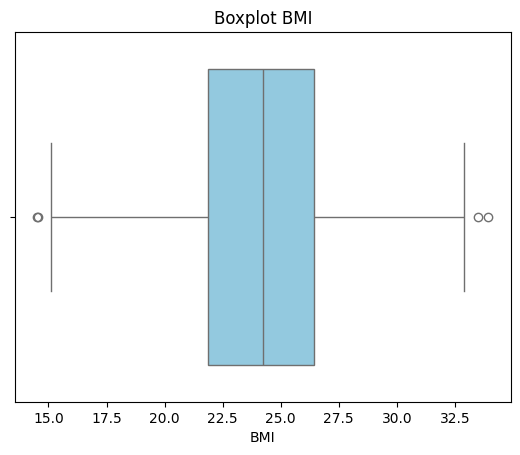

In [17]:
sns.boxplot(x=data['BMI'], color='skyblue')
plt.title('Boxplot BMI')
plt.show()

4. Normalisasi  Kolom

In [25]:
data['hip(inch)'] = data['hip(inch)'] * 2.54

C:\Users\hp\AppData\Local\Temp\ipykernel_10364\2385284852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hip(inch)'] = data['hip(inch)'] * 2.54


In [27]:
data['waist(inch)'] = data['waist(inch)'] * 2.54

C:\Users\hp\AppData\Local\Temp\ipykernel_10364\3676954831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['waist(inch)'] = data['waist(inch)'] * 2.54


In [32]:
data.head()

,pcos (y/n),age (yrs),weight (kg),height(cm),cycle(r/i),hip(inch),waist(inch),weight gain(y/n),hair growth(y/n),skin darkening (y/n),hair loss(y/n),pimples(y/n),fast food (y/n),BMI
0,0,28,44.6,152.0,2,91.44,76.20,0,0,0,0,0,1.0,19.0
1,0,36,65.0,162.0,2,96.52,81.28,0,0,0,0,0,0.0,25.0
2,1,33,68.8,165.0,2,101.60,91.44,0,0,0,1,1,1.0,25.0
3,0,37,65.0,148.0,2,106.68,91.44,0,0,0,0,0,0.0,30.0
4,0,25,52.0,161.0,2,93.98,76.20,0,0,0,1,0,0.0,20.0


In [31]:
data['BMI'] = data['BMI'].round()


C:\Users\hp\AppData\Local\Temp\ipykernel_10364\4053307903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BMI'] = data['BMI'].round()


#### Visualisasi Menggunakan Heatmap

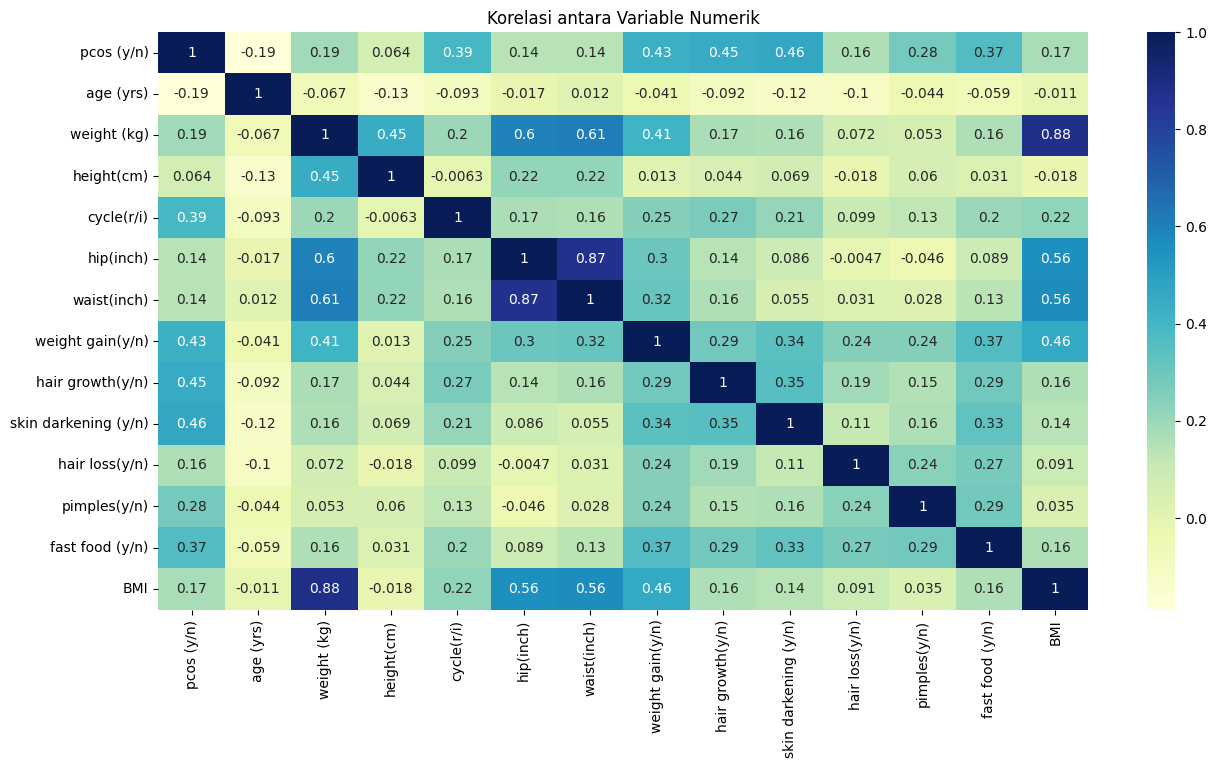

In [36]:
plt.figure(figsize=(15, 7.5))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title('Korelasi antara Variable Numerik')
plt.show()

### Model Selection

1. Import Tools dan Model

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

2. Membagi Data

In [38]:
X = data.drop('pcos (y/n)', axis=1)
y = data['pcos (y/n)']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Melatih Model SVM 

In [40]:
# Inisialisasi model SVM
svm_model = SVC(kernel='linear')  # kernel bisa 'linear', 'poly', 'rbf', 'sigmoid'

# Latih model
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

4.  Tes Akurasi Model menggunakan Confussion Matrix

Akurasi: 85.85%
[[70  3]
 [12 21]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        73
           1       0.88      0.64      0.74        33

    accuracy                           0.86       106
   macro avg       0.86      0.80      0.82       106
weighted avg       0.86      0.86      0.85       106



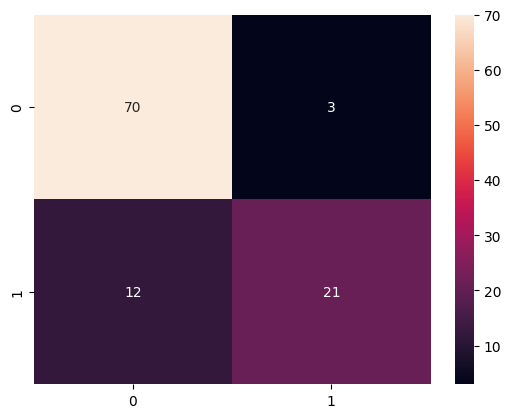

In [41]:
# Prediksi data uji
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

# Evaluasi
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Import Model 

In [43]:
joblib.dump(svm_model, 'PCOS-Model.pkl')

['PCOS-Model.pkl']

### Test Prediksi / Klasifikasi

In [44]:
print(list(X.columns))

['age (yrs)', 'weight (kg)', 'height(cm)', 'cycle(r/i)', 'hip(inch)', 'waist(inch)', 'weight gain(y/n)', 'hair growth(y/n)', 'skin darkening (y/n)', 'hair loss(y/n)', 'pimples(y/n)', 'fast food (y/n)', 'BMI']


In [45]:
load_model = joblib.load('SVM-Model.pkl')

In [52]:
# ['age (yrs)', 'weight (kg)', 'height(cm)', 'cycle(r/i)', 'hip(inch)', 'waist(inch)', 'weight gain(y/n)', 'hair growth(y/n)', 'skin darkening (y/n)', 'hair loss(y/n)', 'pimples(y/n)', 'fast food (y/n)', 'BMI']

predictionsA = load_model.predict(np.array([[33, 68.8, 160.0, 4, 112, 60, 0, 0, 0, 0, 0, 1.0, 25.27]])) #harusnya ini pcos
predictionsB = load_model.predict(np.array([[28, 44.6, 152.0, 2, 90, 50, 0, 0, 0, 0, 0, 1.0, 19.30]])) #harusnya ini tidak pcos

def lakukan_prediksi(predictions):
    if predictions[0] == 0:
        print("Hasil Data tidak Menderita PCOS")
    elif predictions[0] == 1:
        print("Hasil data menunjukkan Menderita PCOS")

lakukan_prediksi(predictionsA)
lakukan_prediksi(predictionsB)

Hasil data menunjukkan Menderita PCOS
Hasil data tidak menderita PCOS


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
